## **Imports and loading dataset**

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_excel("/content/sample_data/ANZ synthesised transaction dataset.xlsx")
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [81]:

df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [82]:
df=df[['txn_description','balance','gender','age','merchant_state','amount','customer_id']]
df['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

## **Modifying data to obtain salaries for each customer**

In [83]:
df_salaries = df[df["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean()
df_salaries.rename(columns={'amount':'salary'},inplace=True)
df_salaries.head()

,balance,age,salary
customer_id,,,
CUS-1005756958,4718.665385,53,970.47
CUS-1117979751,11957.202857,21,3578.65
CUS-1140341822,5841.720000,28,1916.51
CUS-1147642491,8813.467692,34,1711.39
CUS-1196156254,23845.717143,34,3903.73


In [84]:
salaries = []
for customer_id in df["customer_id"]:
    salaries.append(int(df_salaries.loc[customer_id]["salary"]))    
df["annual_salary"] = salaries

In [85]:
data_cust=df.groupby("customer_id").mean()
data_cust=df[['customer_id','age','balance','amount','annual_salary']]
data_cust.head()

,customer_id,age,balance,amount,annual_salary
0,CUS-2487424745,26,35.39,16.25,1013
1,CUS-2487424745,26,21.20,14.19,1013
2,CUS-2142601169,38,5.71,6.42,1002
3,CUS-1614226872,40,2117.22,40.90,892
4,CUS-2487424745,26,17.95,3.25,1013


### **Correlation between Annual_Salary** **& Age**

<Figure size 432x288 with 0 Axes>

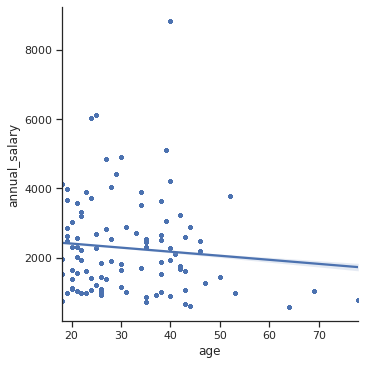

In [86]:
sns.set(style="ticks") 
plt.figure()
sns.lmplot(x='age',y='annual_salary',data=data_cust, scatter_kws={"s": 10})

### **Correlation between Annual_Salary & Balance**

<Figure size 432x288 with 0 Axes>

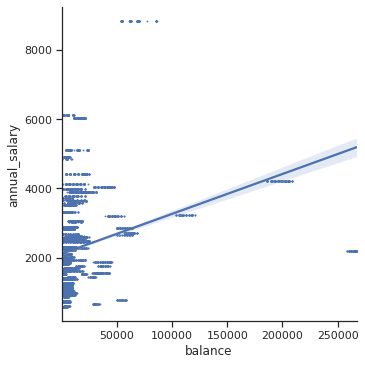

In [87]:
plt.figure() 
sns.lmplot(x='balance',y='annual_salary',data=data_cust, scatter_kws={"s": 1})

### **Correlation between Annual_Salary & Transaction Amount**

<Figure size 432x288 with 0 Axes>

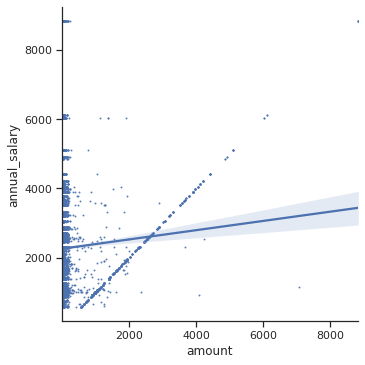

In [88]:
plt.figure()
sns.lmplot(x='amount',y='annual_salary',data=data, scatter_kws={"s": 1})

## **Predictive Analytics**

In [89]:
X = data_cust[['age','amount','balance']]
y = data_cust['annual_salary']

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### **Linear Regression**

In [91]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.08867456963745912

In [92]:
lr.predict(X_test)

array([2304.97113204, 2502.55341914, 2419.70840325, ..., 1631.39445263,
       2179.262521  , 2090.3843481 ])

In [93]:
lr.score(X_test, y_test)

0.0833074816224133

### **Decision Tree Regression**

In [94]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
dc = DecisionTreeRegressor()
dc.fit(X_train, y_train)
dc.score(X_train, y_train)

1.0

In [95]:
dc.predict(X_test)

array([2306., 1138., 1952., ...,  970., 1013.,  996.])

In [96]:
dc.score(X_test, y_test)

0.6968694657827484